In [2]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
%matplotlib inline

# This notebook is based on an excellent tutorial by Kostis Gourgoulias (http://kgourgou.me/)

# Specify size of plot
pl.rcParams['figure.figsize'] = (12.0, 10.0)

# Playing around with the linear perceptron algorithm 


The linear perceptron algorithm can be used to classify data points according to pre-selected features they have. The idea is to find a curve (or hyperplane) that separates points with different features. Once we have the curve, we can use it to decide if future points are of feature A or B based on where they are with respect to the curve (above or below it). 

Now, let generate a collection of points and then paint them according to a line. If the points are above the line, they are blue, if they are below, green. 

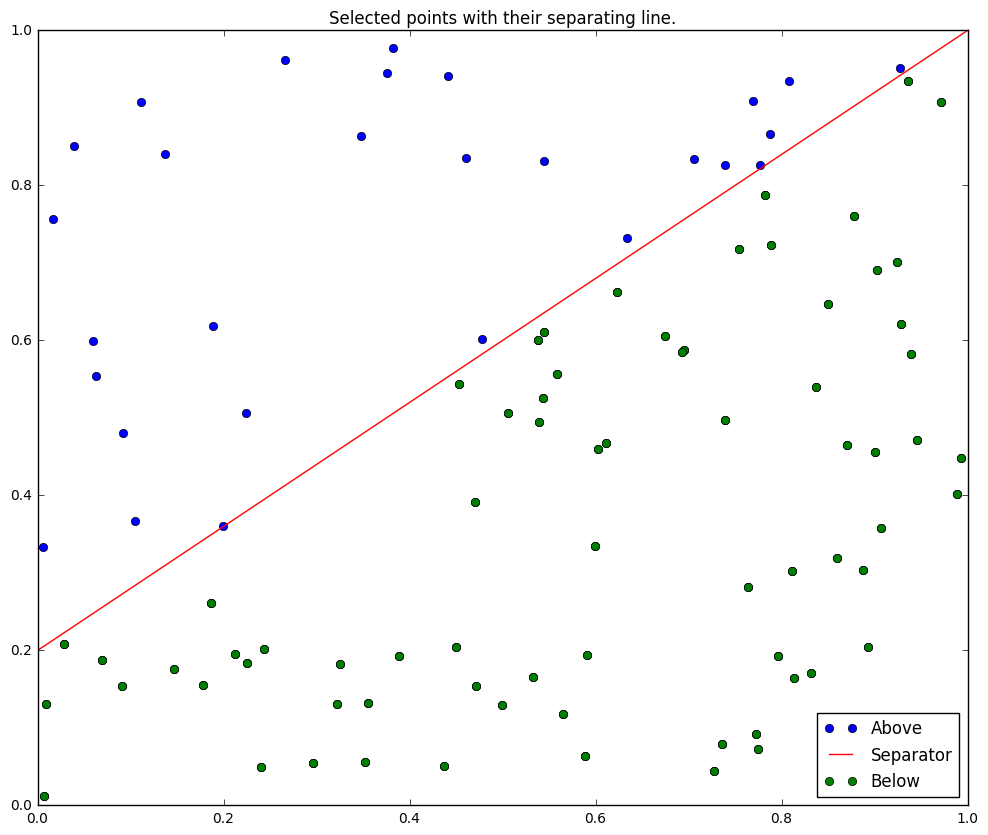

In [12]:
# Generate some points
N = 100
xn = nr.rand(N,2)

x = np.linspace(0,1)

# Pick a line 
#a, b = nr.rand(), nr.rand()
a, b = 0.8, 0.2
f = lambda x : a*x + b

fig = pl.figure()
figa = pl.gca()

pl.plot(xn[:,0],xn[:,1],'bo')
pl.plot(x,f(x),'r')

# Linearly separate the points by the line
yn = np.zeros([N,1])

for i in xrange(N):
    if(f(xn[i,0])>xn[i,1]):
        # Point is below line
        yn[i] = 1
        pl.plot(xn[i,0],xn[i,1],'go')
    else:
        # Point is above line
        yn[i] = -1
        
        
pl.legend(['Above','Separator','Below'],loc=0)
pl.title('Selected points with their separating line.')
#figa.axes.get_xaxis().set_visible(False)
#figa.axes.get_yaxis().set_visible(False)



The curve naturally separates the space into two regions, one of green points and one of blue points. Thus, if I am given a new point, I can assign it a color based on where it is with respect to the curve. It is really that simple.

What is not so simple is to find the curve given the points. However, if the points are linearly separable, i.e. if a line exists that does the job, then I can just move a line around until I get it to the correct position. This is what the linear perceptron algorithm is doing.

In [13]:
def perceptron(xn, yn, max_iter=1000, w=np.zeros(3)):
    '''
        A very simple implementation of the perceptron algorithm for two dimensional data.
        
        Given points (x,y) with x in R^{2} and y in {0,1}, the perceptron learning algorithm searches for the best
        line that separates the data points according to the difference classes defined in y. 
        
        Input: 
            xn : Data points, an Nx2 vector. 
            yn : Classification of the previous data points, an Nx1 vector. 
            max_iter : Maximum number of iterations (optional).
            w  : Initial vector of parameters (optional).
            
        Output: 
            w : Parameters of the best line, y = ax+b, that linearly separates the data. 
        
        Note:
            Convergence will be slower than expected, since this implementation picks points
            to update without a specific plan (randomly). This is enough for a demonstration, not 
            so good for actual work. 
'''
    
    N = xn.shape[0]
    
    # Separating curve
    f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1])

    for _ in xrange(max_iter):
        i = nr.randint(N);
        if(yn[i] != f(xn[i,:])): # If not classified correctly, adjust the line to account for that point.
             w[0] = w[0] + yn[i]
             w[1] = w[1] + yn[i] * xn[i,0]
             w[2] = w[2] + yn[i] * xn[i,1]
            
    return w

Now that we have an implementation, let's see how close it gets.

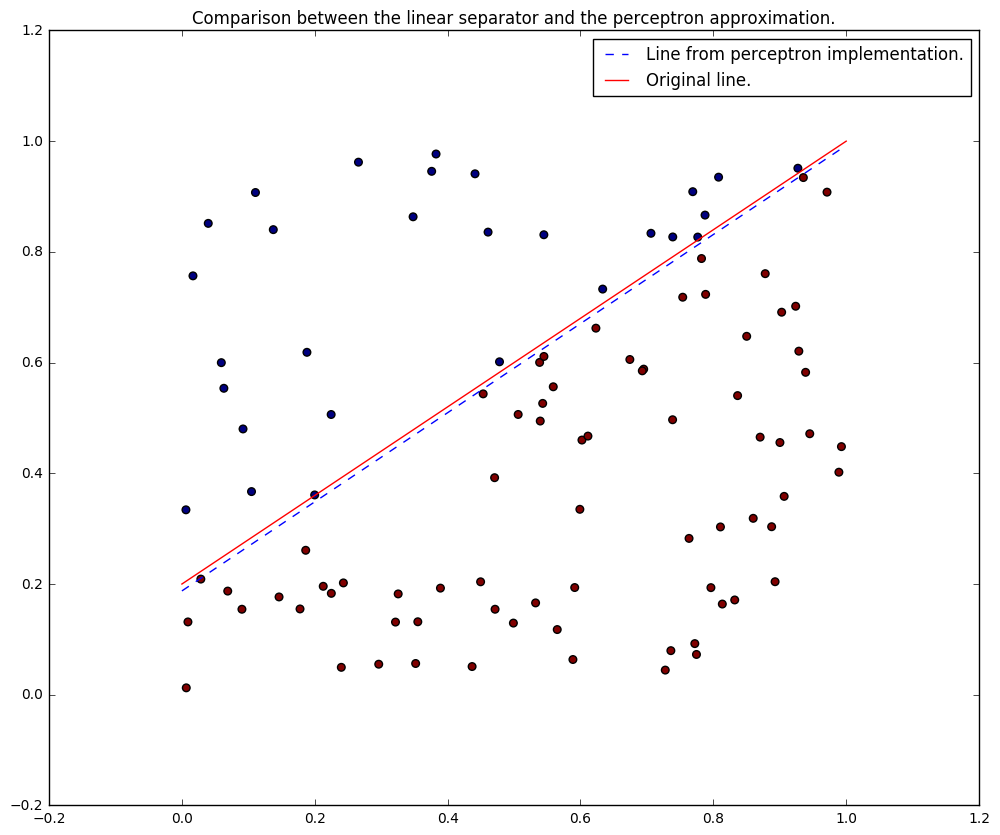

In [15]:
w = perceptron(xn, yn)

# Using weights w to compute a,b for a line y=a*x+b
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

# Computing the colors for the points
sep_color = (yn+1)/2.0;

pl.figure();
figa = pl.gca()

pl.scatter(xn[:,0],xn[:,1],c=sep_color, s=30)
pl.plot(x,y(x),'b--',label='Line from perceptron implementation.')
pl.plot(x,f(x),'r',label='Original line.')
pl.legend()

pl.title('Comparison between the linear separator and the perceptron approximation.')


Not bad, right? The algorithm should have managed to converge to a good approximation of the separating line. If it didn't, try running the last piece of code again. Remember that this implementation updates randomly picked points, so in some cases convergence will be worse.

Also, note that the line that separates the points is not unique, given the dataset we have available. Would it be so if we had all of the possible information? My guess is that this depends on the data. 

In any case, it can be proven that this process works every time, given a sufficient number of steps. This assumes that the data is linearly separable, a fact that is quite powerful on its own. We may be good at finding patterns in $\mathbb{R}^2$ but what about $\mathbb{R}^d$? Is there a way to show that a collection of points can be separated by "inserting" planes between them? We take a look at that next.

# What if the dataset is not linearly separable?

If the data is not separable by a line, then, in most cases, this process will not work perfectly. Some points will be classified correctly and some will not. Then, we can think about two more questions. 

1. How much will it cost us if we missclassify a point? Is the cost an extra spam e-mail in our inbox or is it a patient not getting the correct medicine?
2. If we don't want to take the risk with a line, which is the best curve to use instead?

We are not going to answer those here. Instead, I will just show you an example where the classification can fail, if the points are not separable by a line. Then, if you download this notebook, you can try with other curves and see what happens. 

Remember that, in our case, given a point $x=(x_1,x_2)$, classification is done according to $\text{sign}(f(x_1)-x_2)$, which can either be -1 or 1.

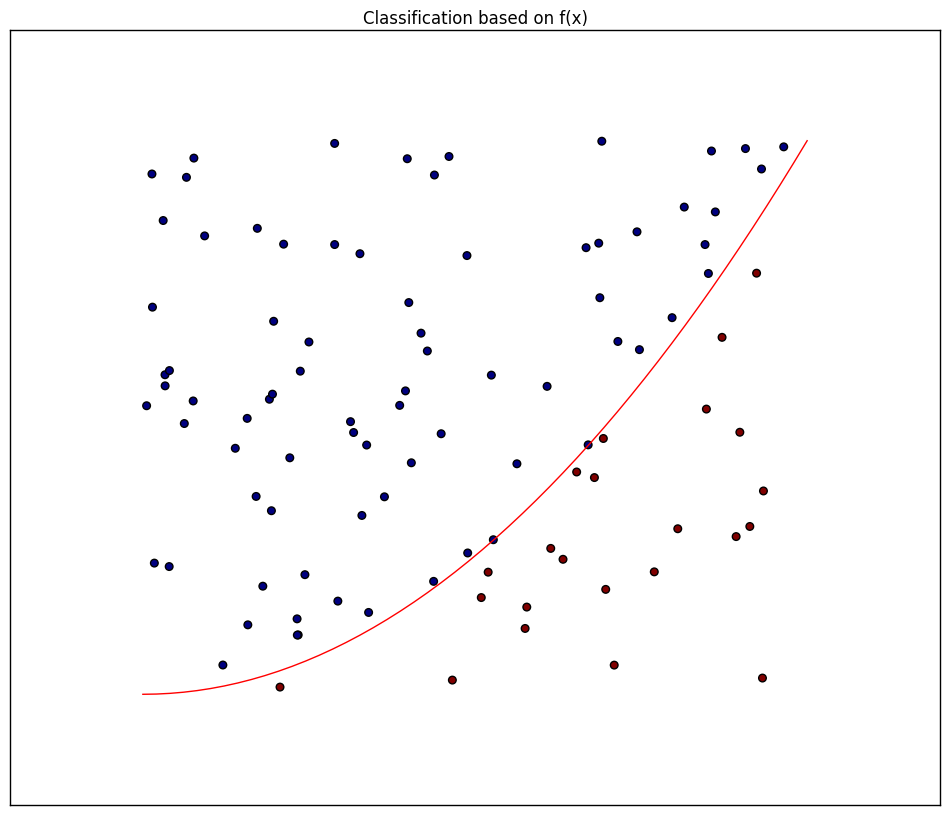

In [16]:
# Change this function to select points with respect to a different curve.
f = lambda x: x**2;

x = np.linspace(0,1);

# Generate some data points to play with.
N = 100
xn = nr.rand(N,2)

fig = pl.figure()
figa = pl.gca();

# Plot classifier 
pl.plot(x,f(x),'r')

# Classify based on f(x)
yn = np.sign(f(xn[:,0])-xn[:,1])

colors = (yn+1)/2.0;

pl.scatter(xn[:,0],xn[:,1],c=colors,s=30);
pl.title('Classification based on f(x)')


In this example, we can see that $x^2$ colours some points as black and others as white. Let us find a linear separator now.

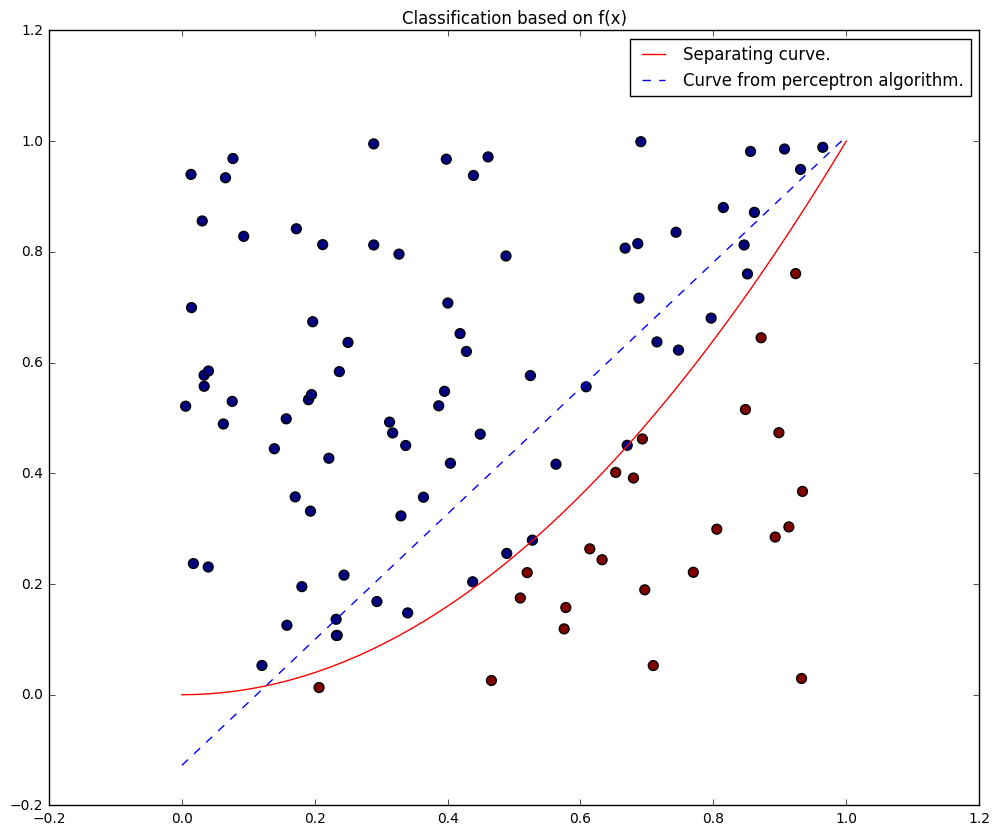

In [19]:
# Try percepton with that data.
w = perceptron(xn, yn, max_iter=1000)

# Re-scale the weights to construct a new representation
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

figa = pl.gca()
pl.scatter(xn[:,0],xn[:,1],c=colors,s=50);
pl.title('Classification based on f(x)')

pl.plot(x,f(x),'r',label='Separating curve.')
pl.plot(x,y(x),'b--',label = 'Curve from perceptron algorithm.')

pl.legend()

In this case, our classifier cannot get all the cases right (white points should be above the blue line, black points below). This situation will probably become worse as we add more and more points. 